In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import *
# import rdkit
# import mordred
# from mordred import Calculator, descriptors, error
# import tensorflow as tf
# import tf.keras as keras

In [31]:
n_jobs=7

In [32]:
train_descriptors = pd.read_csv("train_descriptors.csv")
train_mord3d = pd.read_csv("train_mord3d.csv")
train_morgan = pd.read_csv("train_morgan.csv")
train_rdk = pd.read_csv("train_rdk.csv")

train_crystals = pd.read_csv("train_crystals.csv")
train_distances = pd.read_csv("train_distances.csv")
train_centroid_distances = pd.read_csv("train_centroid_distances.csv")

In [33]:
test_descriptors = pd.read_csv("test_descriptors.csv")
test_mord3d = pd.read_csv("test_mord3d.csv")
test_morgan = pd.read_csv("test_morgan.csv")
test_rdk = pd.read_csv("test_rdk.csv")

test_crystals = pd.read_csv("test_crystals.csv")
test_distances = pd.read_csv("test_distances.csv")
test_centroid_distances = pd.read_csv("test_centroid_distances.csv")

### Data preprocessing

In [20]:
train_descriptors_full = train_descriptors.iloc[:, 3:-2].dropna(axis= 1, how="any")
train_descriptors_full.shape

(13449, 984)

In [21]:
test_descriptors_full = test_descriptors[train_descriptors_full.columns]
test_descriptors_full.shape

(3363, 984)

In [22]:
train_PCA = decomposition.PCA(n_components=.95)
scaler_for_PCA = preprocessing.StandardScaler()
train_descriptors_PCA = train_PCA.fit_transform(scaler_for_PCA.fit_transform(train_descriptors_full))
test_descriptors_PCA = train_PCA.transform(scaler_for_PCA.transform(test_descriptors_full))
print(train_descriptors_PCA.shape, test_descriptors_PCA.shape)

(13449, 124) (3363, 124)


### scoring functions

In [23]:
def nMAE(true, pred):
    return sum(abs(true-pred))/sum(abs(true))

def points(score, alpha=1.2, max_points=25):
    return np.minimum((max_points+2)**(np.maximum(score,np.finfo(float).eps)**alpha) -1, max_points).astype(int)

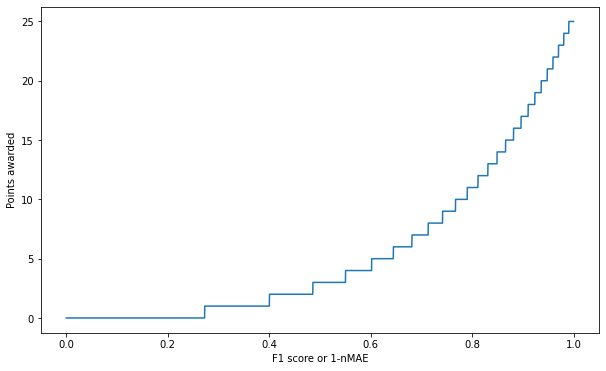

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(np.linspace(0,1,10000), points(np.linspace(0,1,10000), max_points=25))
plt.xlabel("F1 score or 1-nMAE")
plt.ylabel("Points awarded")
plt.show()

### Task 1

R2: 0.9330012706193376 MAE: 0.05494132410853891 nMAE: 0.03637935675700478
Points: 22


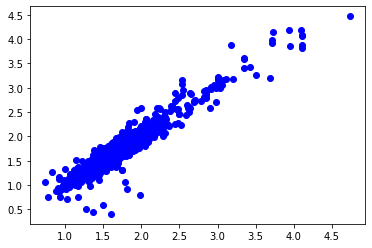

In [25]:
target = "calculated_density"
# model = neural_network.MLPRegressor(hidden_layer_sizes=(64,32)) 
model = ensemble.RandomForestRegressor(n_estimators=500, n_jobs=n_jobs)
model.fit(train_descriptors_PCA, train_crystals[target])
preds = model.predict(test_descriptors_PCA)

print("R2:", metrics.r2_score(test_crystals[target], preds),
      "MAE:", metrics.mean_absolute_error(test_crystals[target], preds),
      "nMAE:", nMAE(test_crystals[target], preds))
print("Points:", points(1-nMAE(test_crystals[target], preds)))

plt.plot(preds, test_crystals[target], "bo")
plt.show()

In [26]:
np.savetxt("task_1_predictions.csv", preds)

### Task 2

Acc: 0.84061849539102 F1mac: 0.6709167466295114 F1wei: 0.8084348925203074
Points: 6


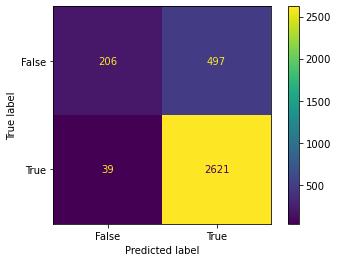

In [27]:
target = "is_centrosymmetric"
# model = neural_network.MLPClassifier(hidden_layer_sizes=(128, 64, 32))
model = ensemble.RandomForestClassifier(n_estimators=500, n_jobs=n_jobs)
model.fit(train_descriptors_PCA, train_crystals[target])
preds = model.predict(test_descriptors_PCA)
print("Acc:", metrics.accuracy_score(test_crystals[target], preds),
      "F1mac:", metrics.f1_score(test_crystals[target], preds, average="macro"),
      "F1wei:", metrics.f1_score(test_crystals[target], preds, average="weighted"))
print("Points:", points(metrics.f1_score(test_crystals[target], preds, average="macro")))

metrics.plot_confusion_matrix(model, test_descriptors_PCA, test_crystals[target])
plt.show()

In [28]:
np.savetxt("task_2_predictions.csv", preds)

### Task 3

[8.60263602 7.94330319 8.17968083 ... 6.09444255 7.8642575  7.932825  ]
R2: 0.8570832806269363 MAE: 0.24758819997800946 nMAE: 0.0336875716108098
Points: 22


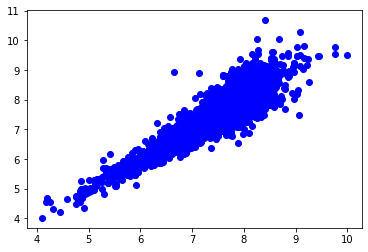

In [35]:
target = "mean"
# model = neural_network.MLPRegressor(hidden_layer_sizes=(128, 128, 64,32)) 
model = ensemble.RandomForestRegressor(n_estimators=500, n_jobs=n_jobs)
model.fit(train_descriptors_PCA, train_centroid_distances[target])
preds = model.predict(test_descriptors_PCA)
print(preds)
print("R2:", metrics.r2_score(test_centroid_distances[target], preds),
      "MAE:", metrics.mean_absolute_error(test_centroid_distances[target], preds),
      "nMAE:", nMAE(test_centroid_distances[target], preds))
print("Points:", points(1-nMAE(test_centroid_distances[target], preds)))

plt.plot(preds, test_centroid_distances[target], "bo")
plt.show()

In [36]:
np.savetxt("task_3_predictions.csv", preds)

### Task 4

R2: 0.49036152205273653 MAE: 3.9706024955614967 nMAE: 0.3250124423164987
Points: 6


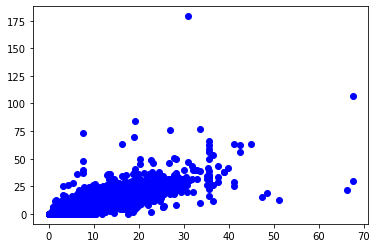

In [37]:
target = "n_vdw_contacts"
# model = neural_network.MLPRegressor(hidden_layer_sizes=(128, 128, 64,32)) 
model = ensemble.RandomForestRegressor(n_estimators=500, n_jobs=n_jobs)
model.fit(train_descriptors_PCA, train_distances[target])
preds = model.predict(test_descriptors_PCA)
print("R2:", metrics.r2_score(test_distances[target], preds),
      "MAE:", metrics.mean_absolute_error(test_distances[target], preds),
      "nMAE:", nMAE(test_distances[target], preds))
print("Points:", points(1-nMAE(test_distances[target], preds)))

plt.plot(preds, test_distances[target], "bo")
plt.show()

In [38]:
np.savetxt("task_4_predictions.csv", preds)

### Some bonus tasks

R2: 0.4666988804864165 MAE: 0.018559164604881127 nMAE: 0.02641429810960875
Points: 10


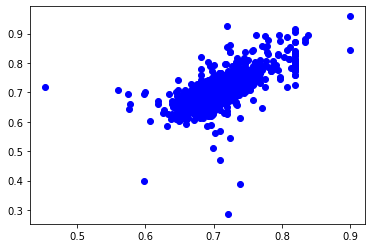

In [39]:
target = "packing_coefficient"
# model = neural_network.MLPRegressor(hidden_layer_sizes=(64,32)) 
model = ensemble.RandomForestRegressor(n_estimators=500, n_jobs=n_jobs)
model.fit(train_descriptors_PCA, train_crystals[target])
preds = model.predict(test_descriptors_PCA)
print("R2:", metrics.r2_score(test_crystals[target], preds),
      "MAE:", metrics.mean_absolute_error(test_crystals[target], preds),
      "nMAE:", nMAE(test_crystals[target], preds))
print("Points:", points(1-nMAE(test_crystals[target], preds), max_points=10))

plt.plot(preds, test_crystals[target], "bo")
plt.show()

In [40]:
np.savetxt("bonus_1_predictions.csv", preds)

R2: 0.2988518222594395 MAE: 263.0898810507318 nMAE: 0.2953892626308466
Points: 4


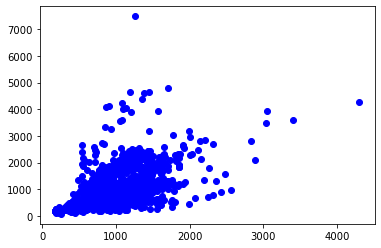

In [41]:
target = "cell_volume"
# model = neural_network.MLPRegressor(hidden_layer_sizes=(64,32)) 
model = ensemble.RandomForestRegressor(n_estimators=500, n_jobs=n_jobs)
model.fit(train_descriptors_PCA, train_crystals[target])
preds = model.predict(test_descriptors_PCA)
print("R2:", metrics.r2_score(test_crystals[target], preds),
      "MAE:", metrics.mean_absolute_error(test_crystals[target], preds),
      "nMAE:", nMAE(test_crystals[target], preds))
print("Points:", points(1-nMAE(test_crystals[target], preds), max_points=10))

plt.plot(preds, test_crystals[target], "bo")
plt.show()

In [42]:
np.savetxt("bonus_2_predictions.csv", preds)

Acc: 0.43651501635444545 F1mac: 0.21724386687366565 F1wei: 0.39968999520367526
Points: 0


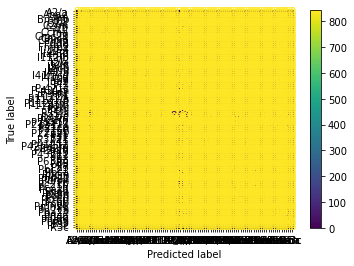

In [43]:
target = "spacegroup_symbol"
# model = neural_network.MLPClassifier(hidden_layer_sizes=(128, 64, 32))
model = ensemble.RandomForestClassifier(n_estimators=500, n_jobs=n_jobs)
model.fit(train_descriptors_PCA, train_crystals[target])
preds = model.predict(test_descriptors_PCA)
print("Acc:", metrics.accuracy_score(test_crystals[target], preds),
      "F1mac:", metrics.f1_score(test_crystals[target], preds, average="macro"),
      "F1wei:", metrics.f1_score(test_crystals[target], preds, average="weighted"))
print("Points:", points(metrics.f1_score(test_crystals[target], preds, average="macro")))

metrics.plot_confusion_matrix(model, test_descriptors_PCA, test_crystals[target])
plt.show()

In [48]:
print(preds)
pd.DataFrame(preds).to_csv("bonus_3_predictions.csv", header=False, index=False)

['P21/c' 'P21/c' 'P21/c' ... 'P21/c' 'P21/c' 'P-1']


In [ ]:
target = "spacegroup_symbol"
train_crystals[target].value_counts().head(20)

In [18]:
popular_spacegroups_index = train_crystals["spacegroup_symbol"].isin(train_crystals[target].value_counts().head(20).index)
train_descriptors_spacegroups = train_descriptors_PCA[popular_spacegroups_index]
train_crystals_spacegroups = train_crystals[popular_spacegroups_index]
print(train_descriptors_spacegroups.shape, train_crystals_spacegroups.shape)

(12552, 124) (12552, 22)


In [19]:
popular_spacegroups_index = test_crystals["spacegroup_symbol"].isin(test_crystals[target].value_counts().head(20).index)
test_descriptors_spacegroups = test_descriptors_PCA[popular_spacegroups_index]
test_crystals_spacegroups = test_crystals[popular_spacegroups_index]
print(test_descriptors_spacegroups.shape, test_crystals_spacegroups.shape)

(3152, 124) (3152, 22)


Acc: 0.45050761421319796 F1mac: 0.32259479133218505 F1wei: 0.41695128536093734
Points: 1


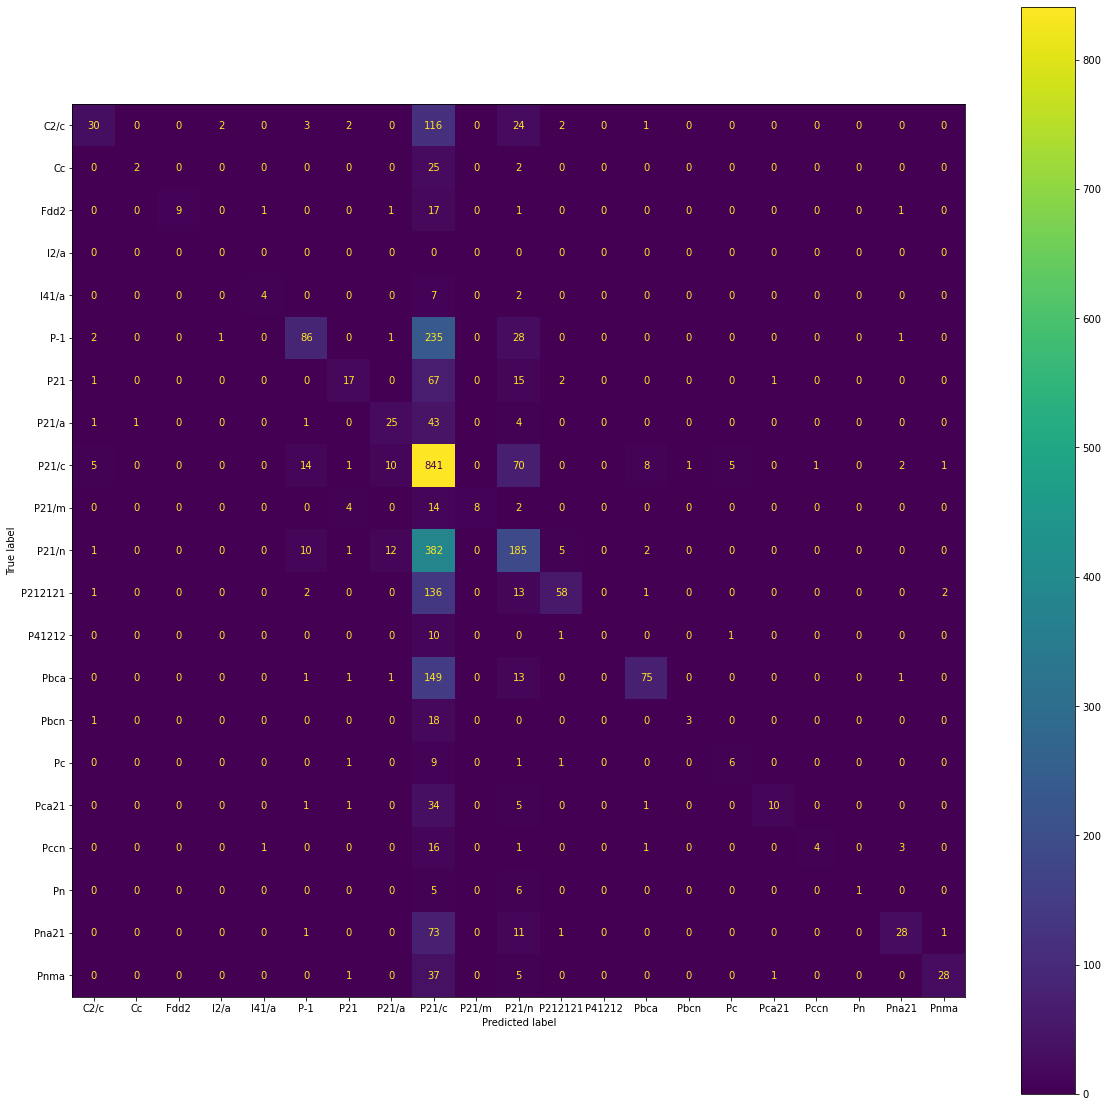

In [20]:
target = "spacegroup_symbol"
model = ensemble.RandomForestClassifier(n_estimators=500, n_jobs=n_jobs)
# model = neural_network.MLPClassifier(hidden_layer_sizes=(128,128,64,32), max_iter=1000)
model.fit(train_descriptors_spacegroups, train_crystals_spacegroups[target])
preds = model.predict(test_descriptors_spacegroups)
print("Acc:", metrics.accuracy_score(test_crystals_spacegroups[target], preds),
      "F1mac:", metrics.f1_score(test_crystals_spacegroups[target], preds, average="macro"),
      "F1wei:", metrics.f1_score(test_crystals_spacegroups[target], preds, average="weighted"))
print("Points:", points(metrics.f1_score(test_crystals_spacegroups[target], preds, average="macro")))

fig, ax = plt.subplots(figsize=(20, 20))
metrics.plot_confusion_matrix(model, test_descriptors_spacegroups, test_crystals_spacegroups[target], ax=ax)
plt.show()